In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Y = np.array([[0],[1],[1],[0]])
X = np.array([[0,0],[0,1],[1,0],[1,1]])

In [3]:
class NeuralNetwork2(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1

        self.learning_rate = 0.05
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)

        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [4]:
class NeuralNetwork3(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 10
        outLayerNeurons = 1

        self.learning_rate = 0.05
        self.W_H1I = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2H1 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_OH2 = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I)
        self.hidden1_output = self.sigmoid(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1)
        self.hidden2_output = self.sigmoid(hidden2_input)

        output_input = np.dot(self.hidden2_output, self.W_OH2)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_OH2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_OH2 += self.hidden2_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [5]:
NN2 = NeuralNetwork2()
NN3 = NeuralNetwork3()

err2 = []
err3 = []

for i in range(100000):
    NN2.train(X,Y)
    err2.append(np.mean(np.square(Y - NN2.feedForward(X))))
    NN3.train(X,Y)
    err3.append(np.mean(np.square(Y - NN3.feedForward(X))))

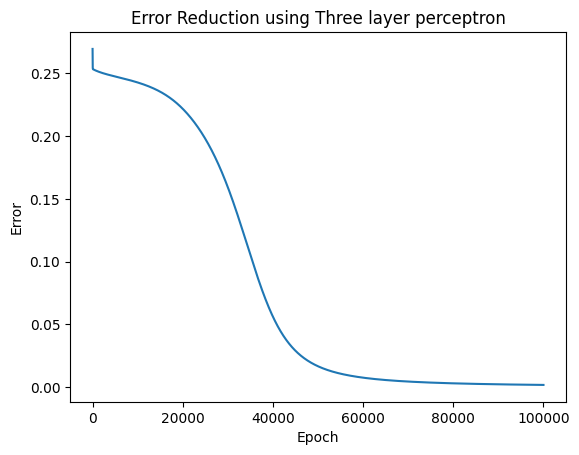

In [6]:
plt.figure()

plt.plot(err3)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Reduction using Three layer perceptron')

plt.show()

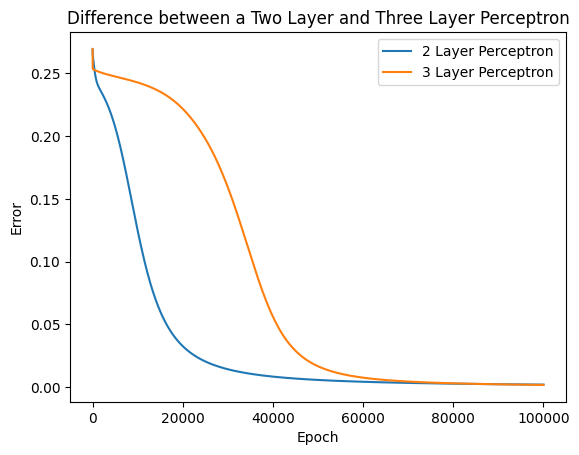

In [7]:
plt.figure()

plt.plot(err2)
plt.plot(err3)
plt.legend(['2 Layer Perceptron', '3 Layer Perceptron'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Difference between a Two Layer and Three Layer Perceptron')

plt.show()